In [1]:
import pandas as pd

world_gym = pd.read_excel("world_gym_sem_nomes.xlsx")
world_gym.head()

,datetime,name,unit,age,gender,RA,time_of_day,days_per_week,time_spent,objectives,activities,requests,comment
0,2023-06-13 16:46:47.727,NaN,Gama,40,Homem,Planaltina/GO,Noite,6,80,"Hipertrofia,","Musculação, Cardio",Um programa com atendimento personalizado de p...,A academia precisa de mais equipamentos...
1,2023-06-13 16:48:08.581,NaN,Asa Norte,44,Homem,Plano Piloto - Asa Norte,Manhã,5,50,"Hipertrofia, Hobby, Elevar autoestima e cuidar...","Musculação, Cardio","Aulas coletivas bem diferentes, Reconhecimento...",Acho que a unidade da asa norte não tem espaço...
2,2023-06-13 16:48:17.491,NaN,Asa Norte,27,Homem,Plano Piloto - Asa Norte,Noite,5,90,"Hipertrofia, Recomendação Médica",Musculação,Um programa com atendimento personalizado de p...,Acho que poderiam orientar melhor os professor...
3,2023-06-13 16:48:24.856,NaN,Itapoã,28,Homem,Paranoá,Manhã,6,40,"Emagrecimento, Recomendação Médica, Hobby, Ele...","Musculação, Lutas","Estou bem satisfeito(a), na verdade",NaN
4,2023-06-13 16:48:26.981,NaN,Asa Norte,36,Homem,Plano Piloto - Asa Sul,Noite,3,40,Motivos Sociais,Musculação,Um programa com atendimento personalizado de p...,Acredito que deveria ter mais aparelhos repeti...


In [2]:
world_gym = world_gym.drop(["name","datetime","comment"], axis=1)
world_gym.head()

,unit,age,gender,RA,time_of_day,days_per_week,time_spent,objectives,activities,requests
0,Gama,40,Homem,Planaltina/GO,Noite,6,80,"Hipertrofia,","Musculação, Cardio",Um programa com atendimento personalizado de p...
1,Asa Norte,44,Homem,Plano Piloto - Asa Norte,Manhã,5,50,"Hipertrofia, Hobby, Elevar autoestima e cuidar...","Musculação, Cardio","Aulas coletivas bem diferentes, Reconhecimento..."
2,Asa Norte,27,Homem,Plano Piloto - Asa Norte,Noite,5,90,"Hipertrofia, Recomendação Médica",Musculação,Um programa com atendimento personalizado de p...
3,Itapoã,28,Homem,Paranoá,Manhã,6,40,"Emagrecimento, Recomendação Médica, Hobby, Ele...","Musculação, Lutas","Estou bem satisfeito(a), na verdade"
4,Asa Norte,36,Homem,Plano Piloto - Asa Sul,Noite,3,40,Motivos Sociais,Musculação,Um programa com atendimento personalizado de p...


In [3]:
world_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   unit           521 non-null    object
 1   age            521 non-null    int64 
 2   gender         521 non-null    object
 3   RA             521 non-null    object
 4   time_of_day    521 non-null    object
 5   days_per_week  521 non-null    int64 
 6   time_spent     521 non-null    int64 
 7   objectives     521 non-null    object
 8   activities     521 non-null    object
 9   requests       521 non-null    object
dtypes: int64(3), object(7)
memory usage: 40.8+ KB


In [4]:
world_gym.describe()

,age,days_per_week,time_spent
count,521.000000,521.000000,521.000000
mean,37.247601,4.752399,84.470250
std,11.422234,1.161116,32.997838
min,14.000000,1.000000,2.000000
25%,29.000000,4.000000,60.000000
50%,36.000000,5.000000,80.000000
75%,44.000000,5.000000,120.000000
max,78.000000,7.000000,350.000000


In [5]:
world_gym[world_gym["time_spent"] == 2]

,unit,age,gender,RA,time_of_day,days_per_week,time_spent,objectives,activities,requests
36,Samambaia - Norte,28,Mulher,Samambaia,Manhã,4,2,"Hipertrofia, Emagrecimento","Musculação, Cardio",Um programa com atendimento personalizado de p...


In [6]:
world_gym.iloc[36,6] = 120

world_gym.describe()

,age,days_per_week,time_spent
count,521.000000,521.000000,521.000000
mean,37.247601,4.752399,84.696737
std,11.422234,1.161116,32.835256
min,14.000000,1.000000,30.000000
25%,29.000000,4.000000,60.000000
50%,36.000000,5.000000,80.000000
75%,44.000000,5.000000,120.000000
max,78.000000,7.000000,350.000000


In [7]:
world_gym["RA"].value_counts()

Samambaia                   127
Gama                         97
Plano Piloto - Asa Norte     85
Planaltina/GO                68
Arniqueira                   49
Itapoã                       39
Paranoá                      18
Planaltina                   12
Sobradinho                    9
Taguatinga                    3
Park Way                      2
Lago Norte                    2
Jardim Botânico               2
Santa Maria                   2
Águas Claras                  2
Plano Piloto - Asa Sul        1
Riacho Fundo                  1
Riacho Fundo II               1
Ceilândia                     1
Name: RA, dtype: int64

In [8]:
morning = []
for i in list(world_gym["time_of_day"]):
    if "Manhã" in i:
        morning.append(True)
    else:
        morning.append(False)
world_gym["Manhã"] = morning

afternoon = []
for i in list(world_gym["time_of_day"]):
    if "Tarde" in i:
        afternoon.append(True)
    else:
        afternoon.append(False)
world_gym["Tarde"] = afternoon

night = []
for i in list(world_gym["time_of_day"]):
    if "Noite" in i:
        night.append(True)
    else:
        night.append(False)
world_gym["Noite"] = night

world_gym.head()

,unit,age,gender,RA,time_of_day,days_per_week,time_spent,objectives,activities,requests,Manhã,Tarde,Noite
0,Gama,40,Homem,Planaltina/GO,Noite,6,80,"Hipertrofia,","Musculação, Cardio",Um programa com atendimento personalizado de p...,False,False,True
1,Asa Norte,44,Homem,Plano Piloto - Asa Norte,Manhã,5,50,"Hipertrofia, Hobby, Elevar autoestima e cuidar...","Musculação, Cardio","Aulas coletivas bem diferentes, Reconhecimento...",True,False,False
2,Asa Norte,27,Homem,Plano Piloto - Asa Norte,Noite,5,90,"Hipertrofia, Recomendação Médica",Musculação,Um programa com atendimento personalizado de p...,False,False,True
3,Itapoã,28,Homem,Paranoá,Manhã,6,40,"Emagrecimento, Recomendação Médica, Hobby, Ele...","Musculação, Lutas","Estou bem satisfeito(a), na verdade",True,False,False
4,Asa Norte,36,Homem,Plano Piloto - Asa Sul,Noite,3,40,Motivos Sociais,Musculação,Um programa com atendimento personalizado de p...,False,False,True


<Axes: >

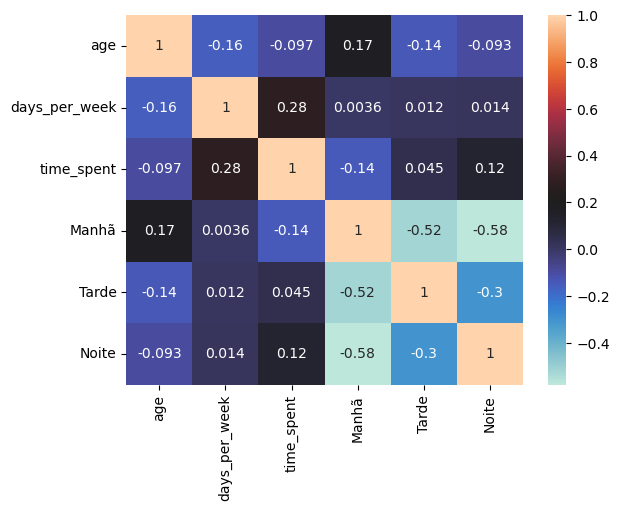

In [9]:
import seaborn as sns

corr_matrix = world_gym.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True,
            cmap=sns.color_palette("icefire", as_cmap=True))

In [10]:
unit_count = world_gym["unit"].value_counts()
unit_count

Samambaia - Norte    127
Asa Norte            100
Gama                  99
Planaltina/GO         79
Itapoã                61
Arniqueira            55
Name: unit, dtype: int64

([<matplotlib.patches.Wedge at 0x1e6f2ebd100>,
 [Text(0.7929102108120599, 0.7624259948283341, 'Samambaia - Norte'),
  Text(-0.5878405630789394, 0.9297545226558652, 'Asa Norte'),
  Text(-1.0795854828396558, -0.21093881871734133, 'Gama'),
  Text(-0.32980978176382864, -1.049392923481427, 'Planaltina/GO'),
  Text(0.5652463066731733, -0.9436612807529707, 'Itapoã'),
  Text(1.0400584358857798, -0.35815981061926183, 'Arniqueira')],
 [Text(0.43249647862475993, 0.41586872445181855, '24.38%'),
  Text(-0.3206403071339669, 0.5071388305395628, '19.19%'),
  Text(-0.5888648088216304, -0.11505753748218617, '19.00%'),
  Text(-0.17989624459845197, -0.5723961400807782, '15.16%'),
  Text(0.30831616727627636, -0.5147243349561658, '11.71%'),
  Text(0.5673046013922435, -0.19535989670141551, '10.56%')])

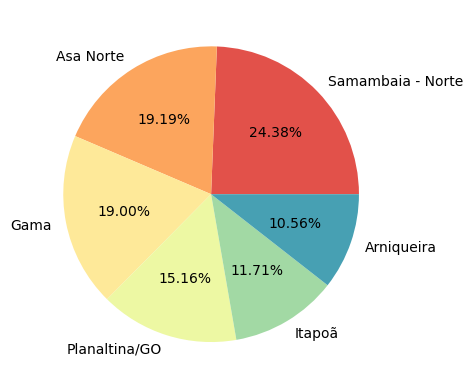

In [11]:
import matplotlib.pyplot as plt

plt.pie(unit_count, labels=unit_count.index,
        colors=sns.color_palette("Spectral",n_colors=6),
        autopct='%1.2f%%')

In [12]:
gender_cat = world_gym[["gender"]]
gender_cat.head(10)

,gender
0,Homem
1,Homem
2,Homem
3,Homem
4,Homem
5,Homem
6,Mulher
7,Homem
8,Homem
9,Mulher


In [13]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
gender_cat = ordinal_encoder.fit_transform(gender_cat)
gender_cat[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.]])

In [14]:
world_gym["gender_ord"] = gender_cat

In [15]:
world_gym.head(10)

,unit,age,gender,RA,time_of_day,days_per_week,time_spent,objectives,activities,requests,Manhã,Tarde,Noite,gender_ord
0,Gama,40,Homem,Planaltina/GO,Noite,6,80,"Hipertrofia,","Musculação, Cardio",Um programa com atendimento personalizado de p...,False,False,True,0.0
1,Asa Norte,44,Homem,Plano Piloto - Asa Norte,Manhã,5,50,"Hipertrofia, Hobby, Elevar autoestima e cuidar...","Musculação, Cardio","Aulas coletivas bem diferentes, Reconhecimento...",True,False,False,0.0
2,Asa Norte,27,Homem,Plano Piloto - Asa Norte,Noite,5,90,"Hipertrofia, Recomendação Médica",Musculação,Um programa com atendimento personalizado de p...,False,False,True,0.0
3,Itapoã,28,Homem,Paranoá,Manhã,6,40,"Emagrecimento, Recomendação Médica, Hobby, Ele...","Musculação, Lutas","Estou bem satisfeito(a), na verdade",True,False,False,0.0
4,Asa Norte,36,Homem,Plano Piloto - Asa Sul,Noite,3,40,Motivos Sociais,Musculação,Um programa com atendimento personalizado de p...,False,False,True,0.0
5,Gama,31,Homem,Gama,Manhã,5,75,Hipertrofia,"Musculação, Cardio","Reconhecimento facial no acesso, Minha unidade...",True,False,False,0.0
6,Asa Norte,39,Mulher,Plano Piloto - Asa Norte,Manhã,5,45,"Hipertrofia, Emagrecimento, Elevar autoestima ...","Musculação, Cardio","Estou bem satisfeito(a), na verdade, Nada diss...",True,False,False,1.0
7,Gama,42,Homem,Gama,Tarde,3,90,"Hipertrofia, Emagrecimento",Musculação,"Reconhecimento facial no acesso, Uma loja com ...",False,True,False,0.0
8,Itapoã,38,Homem,Itapoã,Manhã,5,50,"Hipertrofia, Emagrecimento","Musculação, Cardio","Estou bem satisfeito(a), na verdade",True,False,False,0.0
9,Itapoã,30,Mulher,Itapoã,Manhã,3,50,Elevar autoestima e cuidar da saúde mental,Musculação,Minha unidade aberta 24hs,True,False,False,1.0


In [16]:
list_times = world_gym["time_of_day"].value_counts()
list_times

Manhã                  262
Noite                  134
Tarde                  110
Manhã, Noite             8
Manhã, Tarde             4
Tarde, Noite             2
Manhã, Tarde, Noite      1
Name: time_of_day, dtype: int64

In [17]:
timeday_cat = world_gym[["time_of_day"]]
timeday_cat

,time_of_day
0,Noite
1,Manhã
2,Noite
3,Manhã
4,Noite
...,...
516,Tarde
517,Noite
518,Noite
519,Manhã


In [18]:
timeday_cat = ordinal_encoder.fit_transform(timeday_cat)
timeday_cat[:10]

array([[4.],
       [0.],
       [4.],
       [0.],
       [4.],
       [0.],
       [0.],
       [5.],
       [0.],
       [0.]])

In [19]:
world_gym["time_day_ord"] = timeday_cat
world_gym.head(10)

,unit,age,gender,RA,time_of_day,days_per_week,time_spent,objectives,activities,requests,Manhã,Tarde,Noite,gender_ord,time_day_ord
0,Gama,40,Homem,Planaltina/GO,Noite,6,80,"Hipertrofia,","Musculação, Cardio",Um programa com atendimento personalizado de p...,False,False,True,0.0,4.0
1,Asa Norte,44,Homem,Plano Piloto - Asa Norte,Manhã,5,50,"Hipertrofia, Hobby, Elevar autoestima e cuidar...","Musculação, Cardio","Aulas coletivas bem diferentes, Reconhecimento...",True,False,False,0.0,0.0
2,Asa Norte,27,Homem,Plano Piloto - Asa Norte,Noite,5,90,"Hipertrofia, Recomendação Médica",Musculação,Um programa com atendimento personalizado de p...,False,False,True,0.0,4.0
3,Itapoã,28,Homem,Paranoá,Manhã,6,40,"Emagrecimento, Recomendação Médica, Hobby, Ele...","Musculação, Lutas","Estou bem satisfeito(a), na verdade",True,False,False,0.0,0.0
4,Asa Norte,36,Homem,Plano Piloto - Asa Sul,Noite,3,40,Motivos Sociais,Musculação,Um programa com atendimento personalizado de p...,False,False,True,0.0,4.0
5,Gama,31,Homem,Gama,Manhã,5,75,Hipertrofia,"Musculação, Cardio","Reconhecimento facial no acesso, Minha unidade...",True,False,False,0.0,0.0
6,Asa Norte,39,Mulher,Plano Piloto - Asa Norte,Manhã,5,45,"Hipertrofia, Emagrecimento, Elevar autoestima ...","Musculação, Cardio","Estou bem satisfeito(a), na verdade, Nada diss...",True,False,False,1.0,0.0
7,Gama,42,Homem,Gama,Tarde,3,90,"Hipertrofia, Emagrecimento",Musculação,"Reconhecimento facial no acesso, Uma loja com ...",False,True,False,0.0,5.0
8,Itapoã,38,Homem,Itapoã,Manhã,5,50,"Hipertrofia, Emagrecimento","Musculação, Cardio","Estou bem satisfeito(a), na verdade",True,False,False,0.0,0.0
9,Itapoã,30,Mulher,Itapoã,Manhã,3,50,Elevar autoestima e cuidar da saúde mental,Musculação,Minha unidade aberta 24hs,True,False,False,1.0,0.0


In [20]:
unit_cat = world_gym[["unit"]]
unit_cat

,unit
0,Gama
1,Asa Norte
2,Asa Norte
3,Itapoã
4,Asa Norte
...,...
516,Planaltina/GO
517,Gama
518,Gama
519,Samambaia - Norte


In [21]:
unit_cat = ordinal_encoder.fit_transform(unit_cat)

world_gym["unit_ord"] = unit_cat
world_gym.head(10)

,unit,age,gender,RA,time_of_day,days_per_week,time_spent,objectives,activities,requests,Manhã,Tarde,Noite,gender_ord,time_day_ord,unit_ord
0,Gama,40,Homem,Planaltina/GO,Noite,6,80,"Hipertrofia,","Musculação, Cardio",Um programa com atendimento personalizado de p...,False,False,True,0.0,4.0,2.0
1,Asa Norte,44,Homem,Plano Piloto - Asa Norte,Manhã,5,50,"Hipertrofia, Hobby, Elevar autoestima e cuidar...","Musculação, Cardio","Aulas coletivas bem diferentes, Reconhecimento...",True,False,False,0.0,0.0,1.0
2,Asa Norte,27,Homem,Plano Piloto - Asa Norte,Noite,5,90,"Hipertrofia, Recomendação Médica",Musculação,Um programa com atendimento personalizado de p...,False,False,True,0.0,4.0,1.0
3,Itapoã,28,Homem,Paranoá,Manhã,6,40,"Emagrecimento, Recomendação Médica, Hobby, Ele...","Musculação, Lutas","Estou bem satisfeito(a), na verdade",True,False,False,0.0,0.0,3.0
4,Asa Norte,36,Homem,Plano Piloto - Asa Sul,Noite,3,40,Motivos Sociais,Musculação,Um programa com atendimento personalizado de p...,False,False,True,0.0,4.0,1.0
5,Gama,31,Homem,Gama,Manhã,5,75,Hipertrofia,"Musculação, Cardio","Reconhecimento facial no acesso, Minha unidade...",True,False,False,0.0,0.0,2.0
6,Asa Norte,39,Mulher,Plano Piloto - Asa Norte,Manhã,5,45,"Hipertrofia, Emagrecimento, Elevar autoestima ...","Musculação, Cardio","Estou bem satisfeito(a), na verdade, Nada diss...",True,False,False,1.0,0.0,1.0
7,Gama,42,Homem,Gama,Tarde,3,90,"Hipertrofia, Emagrecimento",Musculação,"Reconhecimento facial no acesso, Uma loja com ...",False,True,False,0.0,5.0,2.0
8,Itapoã,38,Homem,Itapoã,Manhã,5,50,"Hipertrofia, Emagrecimento","Musculação, Cardio","Estou bem satisfeito(a), na verdade",True,False,False,0.0,0.0,3.0
9,Itapoã,30,Mulher,Itapoã,Manhã,3,50,Elevar autoestima e cuidar da saúde mental,Musculação,Minha unidade aberta 24hs,True,False,False,1.0,0.0,3.0


In [22]:
ra_cat = world_gym[["RA"]]

ra_cat = ordinal_encoder.fit_transform(ra_cat)
world_gym["ra_ord"] = ra_cat

world_gym.head(10)

,unit,age,gender,RA,time_of_day,days_per_week,time_spent,objectives,activities,requests,Manhã,Tarde,Noite,gender_ord,time_day_ord,unit_ord,ra_ord
0,Gama,40,Homem,Planaltina/GO,Noite,6,80,"Hipertrofia,","Musculação, Cardio",Um programa com atendimento personalizado de p...,False,False,True,0.0,4.0,2.0,9.0
1,Asa Norte,44,Homem,Plano Piloto - Asa Norte,Manhã,5,50,"Hipertrofia, Hobby, Elevar autoestima e cuidar...","Musculação, Cardio","Aulas coletivas bem diferentes, Reconhecimento...",True,False,False,0.0,0.0,1.0,10.0
2,Asa Norte,27,Homem,Plano Piloto - Asa Norte,Noite,5,90,"Hipertrofia, Recomendação Médica",Musculação,Um programa com atendimento personalizado de p...,False,False,True,0.0,4.0,1.0,10.0
3,Itapoã,28,Homem,Paranoá,Manhã,6,40,"Emagrecimento, Recomendação Médica, Hobby, Ele...","Musculação, Lutas","Estou bem satisfeito(a), na verdade",True,False,False,0.0,0.0,3.0,6.0
4,Asa Norte,36,Homem,Plano Piloto - Asa Sul,Noite,3,40,Motivos Sociais,Musculação,Um programa com atendimento personalizado de p...,False,False,True,0.0,4.0,1.0,11.0
5,Gama,31,Homem,Gama,Manhã,5,75,Hipertrofia,"Musculação, Cardio","Reconhecimento facial no acesso, Minha unidade...",True,False,False,0.0,0.0,2.0,2.0
6,Asa Norte,39,Mulher,Plano Piloto - Asa Norte,Manhã,5,45,"Hipertrofia, Emagrecimento, Elevar autoestima ...","Musculação, Cardio","Estou bem satisfeito(a), na verdade, Nada diss...",True,False,False,1.0,0.0,1.0,10.0
7,Gama,42,Homem,Gama,Tarde,3,90,"Hipertrofia, Emagrecimento",Musculação,"Reconhecimento facial no acesso, Uma loja com ...",False,True,False,0.0,5.0,2.0,2.0
8,Itapoã,38,Homem,Itapoã,Manhã,5,50,"Hipertrofia, Emagrecimento","Musculação, Cardio","Estou bem satisfeito(a), na verdade",True,False,False,0.0,0.0,3.0,3.0
9,Itapoã,30,Mulher,Itapoã,Manhã,3,50,Elevar autoestima e cuidar da saúde mental,Musculação,Minha unidade aberta 24hs,True,False,False,1.0,0.0,3.0,3.0
